In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [2]:
for i in range(1,31):
    print(i,np.load(f"./dataset/seq_fall-2023-{i}.npy").shape)

1 (41, 30, 49)
2 (35, 30, 49)
3 (32, 30, 49)
4 (37, 30, 49)
5 (41, 30, 49)
6 (36, 30, 49)
7 (32, 30, 49)
8 (37, 30, 49)
9 (5, 30, 49)
10 (17, 30, 49)
11 (28, 30, 49)
12 (28, 30, 49)
13 (18, 30, 49)
14 (14, 30, 49)
15 (26, 30, 49)
16 (28, 30, 49)
17 (22, 30, 49)
18 (21, 30, 49)
19 (46, 30, 49)
20 (42, 30, 49)
21 (41, 30, 49)
22 (31, 30, 49)
23 (38, 30, 49)
24 (40, 30, 49)
25 (36, 30, 49)
26 (48, 30, 49)
27 (46, 30, 49)
28 (50, 30, 49)
29 (50, 30, 49)
30 (41, 30, 49)


In [4]:
actions = [
    'fall','stand','walking','lie'
]
data = np.load("dataset/seq_fall-2023-1.npy")
datas = np.load("dataset/seq_stand-2023-1.npy")
datas2 = np.load("dataset/seq_walking-2023-1.npy")
datas3 = np.load("dataset/seq_lie-2023-1.npy")
for i in range(2,31):
    data = np.concatenate([
        data,
        np.load(f'dataset/seq_fall-2023-{i}.npy')
    ], axis=0)
    
# for i in range(2,3):
#     datas = np.concatenate([
#         datas,
#         np.load(f'dataset/seq_stand-2023-{i}.npy')
#     ], axis=0)
    
for i in range(2,3):
    data = np.concatenate([
        data,
        np.load(f'dataset/seq_walking-2023-{i}.npy')
    ], axis=0)
    
for i in range(2,3):
    data = np.concatenate([
        data,
        np.load(f'dataset/seq_lie-2023-{i}.npy')
    ], axis=0)    
        
data = np.concatenate([data,datas])
data = np.concatenate([data,datas2])
data = np.concatenate([data,datas3])
print(data.shape)
print(datas.shape)

(7286, 30, 49)
(995, 30, 49)


In [5]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)
print(labels[700:1000])


(7286, 30, 48)
(7286,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(7286, 4)

In [7]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.4,random_state=2022)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(4371, 30, 48) (4371, 4)
(2915, 30, 48) (2915, 4)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,Dropout

model = Sequential([
    GRU(64,dropout=0.3,activation="relu",input_shape=x_train.shape[1:3]),
    # GRU(32,dropout=0.3),
    # Dropout(0.2),
    Dense(32, activation='relu'),
    
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                21888     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 24,100
Trainable params: 24,100
Non-trainable params: 0
_________________________________________________________________


In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
130/137 [===========================>..] - ETA: 0s - loss: 1.3282 - acc: 0.6627
Epoch 1: val_acc improved from -inf to 0.66312, saving model to models\model.h5
137/137 [==============================] - 3s 9ms/step - loss: 1.2892 - acc: 0.6692 - val_loss: 0.9003 - val_acc: 0.6631 - lr: 0.0010
Epoch 2/200
133/137 [============================>.] - ETA: 0s - loss: 0.4531 - acc: 0.8642
Epoch 2: val_acc improved from 0.66312 to 0.76878, saving model to models\model.h5
137/137 [==============================] - 1s 7ms/step - loss: 0.4510 - acc: 0.8648 - val_loss: 0.6664 - val_acc: 0.7688 - lr: 0.0010
Epoch 3/200
137/137 [==============================] - ETA: 0s - loss: 0.2614 - acc: 0.9197
Epoch 3: val_acc improved from 0.76878 to 0.78868, saving model to models\model.h5
137/137 [==============================] - 1s 7ms/step - loss: 0.2614 - acc: 0.9197 - val_loss: 0.5873 - val_acc: 0.7887 - lr: 0.0010
Epoch 4/200
129/137 [===========================>..] - ETA: 0s - loss: 0.157

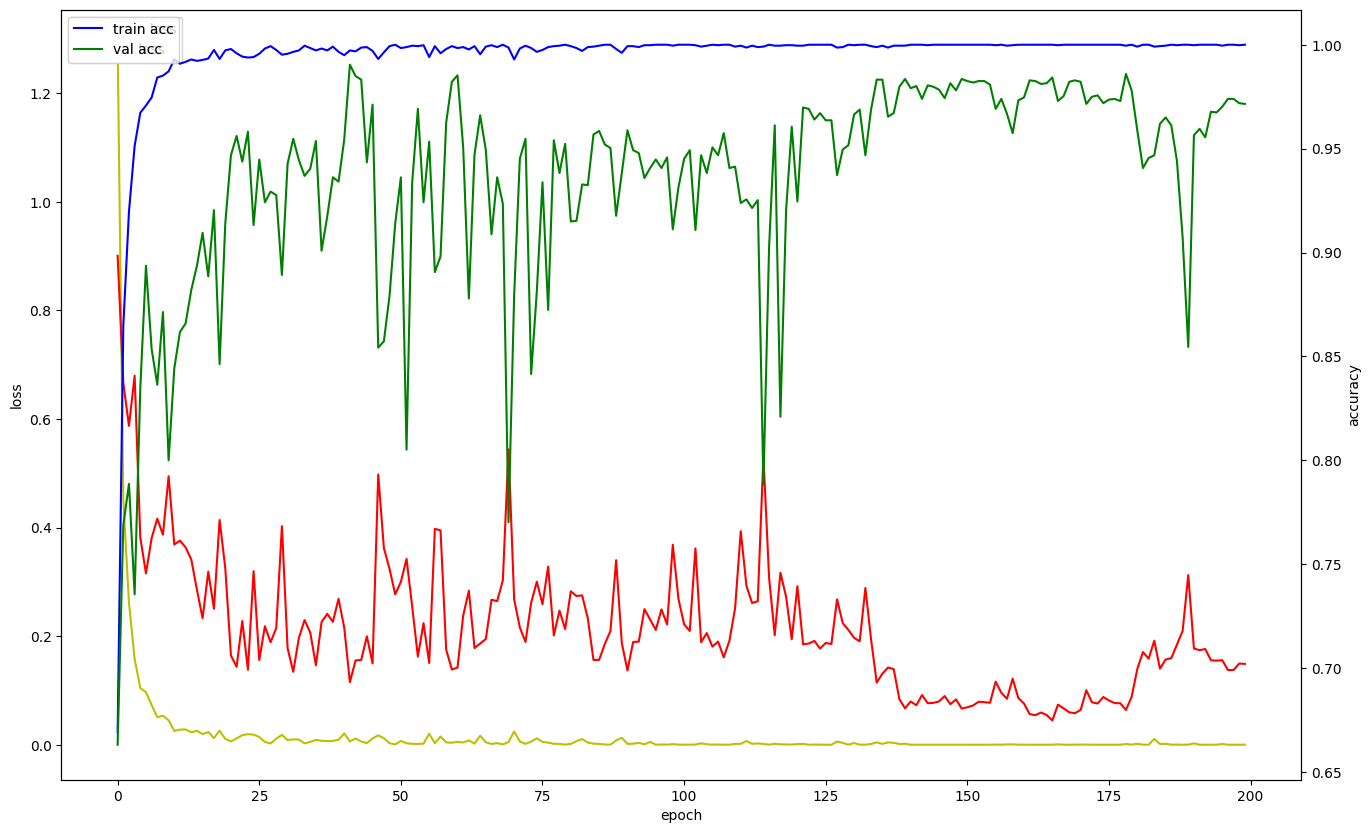

In [10]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [11]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

92/92 [==============================] - 0s 2ms/step


array([[[2499,    8],
        [   8,  400]],

       [[2531,    0],
        [   0,  384]],

       [[1941,   16],
        [   5,  953]],

       [[1746,    4],
        [  15, 1150]]], dtype=int64)